In [1]:
from traffic.data import airports
airports['LFBO']

LFBO/TLS    Toulouse Blagnac Airport (France)
	43.634998 1.367778 altitude: 499

In [2]:
airports['LFBO'].lat

43.634998

In [3]:
airports.search('Tokyo')

[RJTT/HND    Tokyo Haneda International Airport (Japan)
	35.55225 139.779602 altitude: 21,
 RJAA/NRT    Tokyo Narita International Airport (Japan)
	35.764721 140.386307 altitude: 135]

In [4]:
from traffic.data import navaids
navaids['NARAK']

NARAK (FIX): 44.295278 1.748889

In [5]:
navaids.search('gaillac')

[GAI (VOR): 43.954056 1.824167 979
GAILLAC-CASTELNEAU DE MONTMIRAIL VOR 115.8MHz]

In [6]:
from traffic.data import airways
airways.through('NARAK', up_min=400)

{'UN859', 'UQ169'}

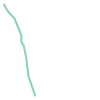

In [7]:
airways['UN859']

In [8]:
# More advanced plotting
from cartopy.feature import NaturalEarthFeature
from cartopy.crs import PlateCarree, EuroPP

countries = NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='10m',
    edgecolor='#524c50',
    facecolor='none',
    alpha=.5)

default_text = {'ha': 'center',
                'fontname': 'Ubuntu',
                'fontsize': 13,}

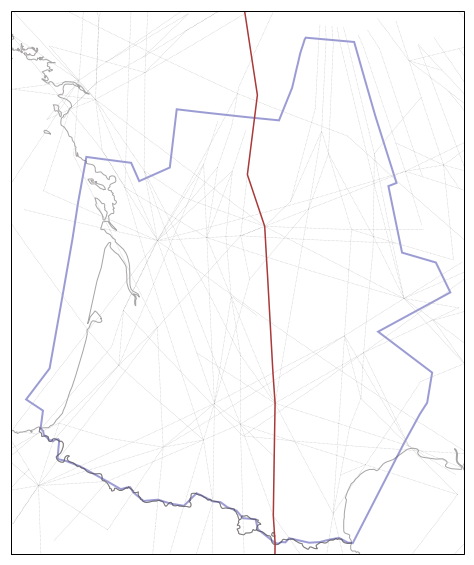

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from traffic.data import sectors

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=EuroPP())

ax.add_feature(countries)
#ax.gridlines()
ax.set_extent(sectors['LFBBBDX'].extent)

sectors['LFBBBDX'].plot(ax, edgecolor="#3a3aaa", lw=2, alpha=.5)
airways.intersects(sectors['LFBBBDX'].flatten(), up_min=400).plot(ax, lw=.5)

ax.plot(*airways['UN859'].xy, color="#aa3a3a", transform=PlateCarree())
